In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [8]:
import tensorflow as tf

# List available devices
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Physical Devices: ", tf.config.list_physical_devices())


Num GPUs Available:  1
Physical Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
!pip install --upgrade pip
!pip install GPUtil

In [10]:
import GPUtil

# Get the list of all GPUs & its status
gpus = GPUtil.getGPUs()

# Print GPU information
for gpu in gpus:
    print(f"GPU ID: {gpu.id}")
    print(f"Name: {gpu.name}")
    print(f"Memory Total: {gpu.memoryTotal}MB")
    print(f"Memory Free: {gpu.memoryFree}MB")
    print(f"Memory Used: {gpu.memoryUsed}MB")
    print(f"GPU Load: {gpu.load * 100}%")
    print(f"Temperature: {gpu.temperature}°C")
    print("----------")


GPU ID: 0
Name: Tesla P100-PCIE-16GB
Memory Total: 16384.0MB
Memory Free: 16268.0MB
Memory Used: 3.0MB
GPU Load: 0.0%
Temperature: 34.0°C
----------


### Data Visualization

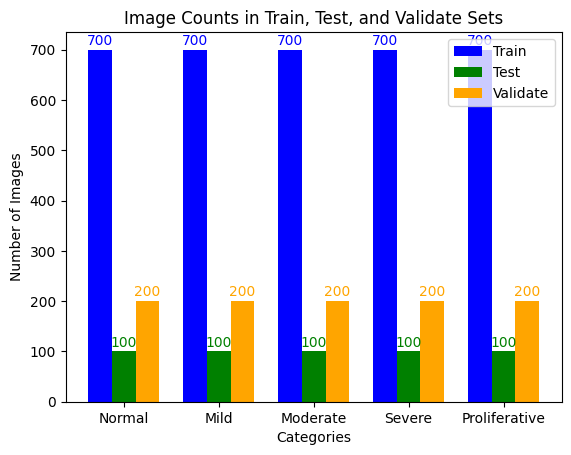

In [11]:
# Define the base directories for train, test, and validate datasets
dataset_base_dir = '/kaggle/input/rgbdataset/dataset'  # Replace with your dataset directory
train_dir = os.path.join(dataset_base_dir, 'train')
test_dir = os.path.join(dataset_base_dir, 'test')
validate_dir = os.path.join(dataset_base_dir, 'validate')

# Define the categories (subfolders) in each directory
categories = ['Normal', 'Mild', 'Moderate', 'Severe', 'Proliferative']

# Function to count the number of images in each category
def count_images_in_category(base_dir, categories):
    image_counts = {}
    for category in categories:
        category_folder = os.path.join(base_dir, category)
        if os.path.exists(category_folder):
            image_counts[category] = len([f for f in os.listdir(category_folder) if os.path.isfile(os.path.join(category_folder, f))])
        else:
            image_counts[category] = 0  # If the folder doesn't exist, count is 0
    return image_counts

# Count images in train, test, and validate directories
train_counts = count_images_in_category(train_dir, categories)
test_counts = count_images_in_category(test_dir, categories)
validate_counts = count_images_in_category(validate_dir, categories)

# Bar plot for image counts in each set (train, test, validate)
def plot_image_counts(train_counts, test_counts, validate_counts, categories):
    bar_width = 0.25  # Width of each bar
    index = range(len(categories))  # Index for the categories

    # Bar positions for each dataset
    train_bar = [i for i in index]
    test_bar = [i + bar_width for i in index]
    validate_bar = [i + 2 * bar_width for i in index]

    # Plotting the bars
    plt.bar(train_bar, list(train_counts.values()), width=bar_width, label='Train', color='blue')
    plt.bar(test_bar, list(test_counts.values()), width=bar_width, label='Test', color='green')
    plt.bar(validate_bar, list(validate_counts.values()), width=bar_width, label='Validate', color='orange')

    # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Image Counts in Train, Test, and Validate Sets')

    # Set category names as the x-axis labels
    plt.xticks([r + bar_width for r in range(len(categories))], categories)

    # Adding exact numbers on top of each bar
    for i in range(len(categories)):
        plt.text(train_bar[i], train_counts[categories[i]] + 10, str(train_counts[categories[i]]), ha='center', color='blue', fontsize=10)
        plt.text(test_bar[i], test_counts[categories[i]] + 10, str(test_counts[categories[i]]), ha='center', color='green', fontsize=10)
        plt.text(validate_bar[i], validate_counts[categories[i]] + 10, str(validate_counts[categories[i]]), ha='center', color='orange', fontsize=10)

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Plot the image counts
plot_image_counts(train_counts, test_counts, validate_counts, categories)


In [12]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/rgbdataset/dataset/train',  # Full path to the 'train' directory
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=16,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)


Found 3500 files belonging to 5 classes.


### Validation Image Preprocessing

In [13]:
### Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/rgbdataset/dataset/validate',  # Full path to the 'train' directory
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=16,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 1000 files belonging to 5 classes.


In [14]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [15]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[1. 1. 1.]
   [1. 0. 0.]
   [2. 0. 1.]
   ...
   [2. 0. 1.]
   [2. 0. 1.]
   [2. 0. 1.]]

  [[1. 1. 1.]
   [2. 0. 1.]
   [2. 0. 1.]
   ...
   [2. 0. 1.]
   [2. 0. 1.]
   [2. 0. 1.]]

  [[1. 1. 1.]
   [1. 0. 0.]
   [1. 1. 1.]
   ...
   [2. 0. 1.]
   [2. 0. 1.]
   [2. 0. 1.]]

  ...

  [[1. 1. 1.]
   [0. 0. 0.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [0. 0. 0.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [2. 0. 1.]]]


 [[[2. 2. 2.]
   [3. 1. 2.]
   [2. 1. 1.]
   ...
   [2. 2. 2.]
   [2. 2. 2.]
   [3. 1. 2.]]

  [[1. 1. 1.]
   [3. 1. 2.]
   [2. 2. 2.]
   ...
   [2. 2. 2.]
   [2. 2. 2.]
   [3. 1. 2.]]

  [[2. 2. 2.]
   [3. 1. 2.]
   [2. 2. 2.]
   ...
   [3. 3. 3.]
   [2. 2. 2.]
   [2. 2. 2.]]

  ...

  [[3. 1. 2.]
   [3. 1. 2.]
   [4. 2. 3.]
   ...
   [1. 1. 1.]
   [2. 2. 2.]
   [2. 2. 2.]]

  [[2. 0. 1.]
   [3. 1. 2.]
   [4. 3. 4.]
 

### To avoid Overshooting
1. Choose small learning rate default is 0.001, we are taking 0.001
2. There may be chance of Underfitting , so increase numbe of neuron
3. Add more Convulation layer to extract more feature from images there may be possibly that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature


  ## Building Model

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()

## Building Convulataion Layer

In [18]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu')) # This layer now expects a 4D tensor
model.add(MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [20]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [21]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [22]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [23]:
model.add(Dropout(0.25)) #To avoid overfitting

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(units=1500, activation='relu'))

In [26]:
model.add(Dropout(0.4))

In [27]:
#Output Layer
model.add(Dense(5, activation='softmax'))

## Compiling Model


In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      13,825,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           7,505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,185,421 (61.74 MB)

 Trainable params: 16,185,421 (61.74 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [30]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=20)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.3559 - loss: 1.4981 - val_accuracy: 0.4620 - val_loss: 1.2471
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.5288 - loss: 1.1415 - val_accuracy: 0.5350 - val_loss: 1.1474
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.5691 - loss: 1.0513 - val_accuracy: 0.5640 - val_loss: 1.0915
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.6134 - loss: 0.9652 - val_accuracy: 0.5800 - val_loss: 1.0890
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.6475 - loss: 0.8996 - val_accuracy: 0.6080 - val_loss: 1.0255
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.6806 - loss: 0.8107 - val_accuracy: 0.6280 - val_loss: 1.0455
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.7173 - loss: 0.7519 - val_accuracy: 0.6410 - val_loss: 1.0169
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.7591 - loss: 0.6279 -

## Model Evaluation

In [31]:
# model Evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9659 - loss: 0.1252


In [32]:
print(train_loss, train_acc)

0.12167850136756897 0.9702857136726379


In [33]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7680 - loss: 1.3834


In [34]:
print(val_loss, val_acc)

1.603359341621399 0.7369999885559082


### Save this Model

In [35]:
model.save("/kaggle/working/trained_model.keras", save_format='keras') #keras is better than h5 as it takes less space


In [36]:
training_history.history

{'accuracy': [0.44028571248054504,
  0.5371428728103638,
  0.5734285712242126,
  0.6154285669326782,
  0.6482856869697571,
  0.6765714287757874,
  0.7234285473823547,
  0.7631428837776184,
  0.7997142672538757,
  0.8428571224212646,
  0.8805714249610901,
  0.899142861366272,
  0.9160000085830688,
  0.9279999732971191,
  0.9337142705917358,
  0.9537143111228943,
  0.9602857232093811,
  0.9605714082717896,
  0.9637143015861511,
  0.9711428284645081],
 'loss': [1.3048454523086548,
  1.1224509477615356,
  1.0460588932037354,
  0.9658774137496948,
  0.8875330686569214,
  0.8213659524917603,
  0.7401396036148071,
  0.6156454086303711,
  0.5204200148582458,
  0.42192232608795166,
  0.3376731276512146,
  0.29326650500297546,
  0.2397938370704651,
  0.2128056436777115,
  0.19843223690986633,
  0.15645579993724823,
  0.1323663741350174,
  0.12536826729774475,
  0.13203269243240356,
  0.10886690020561218],
 'val_accuracy': [0.4620000123977661,
  0.5350000262260437,
  0.5640000104904175,
  0.57999

In [37]:
training_history.history['accuracy']

[0.44028571248054504,
 0.5371428728103638,
 0.5734285712242126,
 0.6154285669326782,
 0.6482856869697571,
 0.6765714287757874,
 0.7234285473823547,
 0.7631428837776184,
 0.7997142672538757,
 0.8428571224212646,
 0.8805714249610901,
 0.899142861366272,
 0.9160000085830688,
 0.9279999732971191,
 0.9337142705917358,
 0.9537143111228943,
 0.9602857232093811,
 0.9605714082717896,
 0.9637143015861511,
 0.9711428284645081]

## Accuracy Visualization

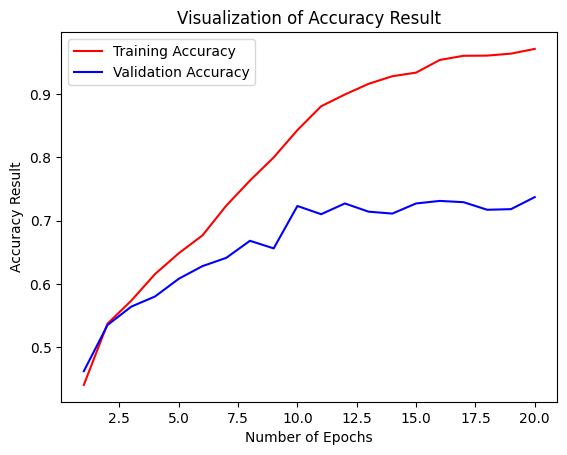

In [38]:
# Assuming your training history contains accuracy data
epochs = list(range(1, len(training_history.history['accuracy']) + 1))

# Plotting the accuracies
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()


### Some other metrics for model evaluation

In [39]:
class_name = validation_set.class_names
class_name

['Mild', 'Moderate', 'Normal', 'Proliferative', 'Severe']

In [40]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/rgbdataset/dataset/test',  # Full path to the 'train' directory
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=16,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 500 files belonging to 5 classes.


In [41]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


(array([[1.0000000e+00, 1.2427188e-09, 1.4001014e-10, 6.0515822e-11,
         1.1595471e-11],
        [9.8292327e-01, 1.7069677e-02, 4.9715800e-06, 1.8305178e-06,
         2.3244208e-07],
        [9.9906117e-01, 9.2210592e-04, 6.3026616e-15, 1.2343494e-05,
         4.3667374e-06],
        ...,
        [1.6208385e-03, 1.7642567e-03, 3.0028131e-13, 4.8887404e-03,
         9.9172616e-01],
        [6.2620495e-07, 1.8756631e-01, 4.9173128e-17, 8.0914325e-01,
         3.2898043e-03],
        [2.1970493e-05, 8.3043444e-04, 9.1116741e-09, 4.9030878e-06,
         9.9914265e-01]], dtype=float32),
 (500, 5))

In [42]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [43]:
predicted_categories

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 1, 1, 1, 0, 1, 1, 3, 1, 1,
       1, 0, 1, 4, 3, 1, 4, 4, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 4, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 3, 4, 1, 1, 1,
       3, 2, 1, 0, 0, 1, 1, 1, 4, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 0,
       2, 1, 1, 3, 4, 1, 0, 1, 1, 1, 0, 1, 0, 0, 4, 0, 1, 4, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2,
     

In [44]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(500, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [45]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

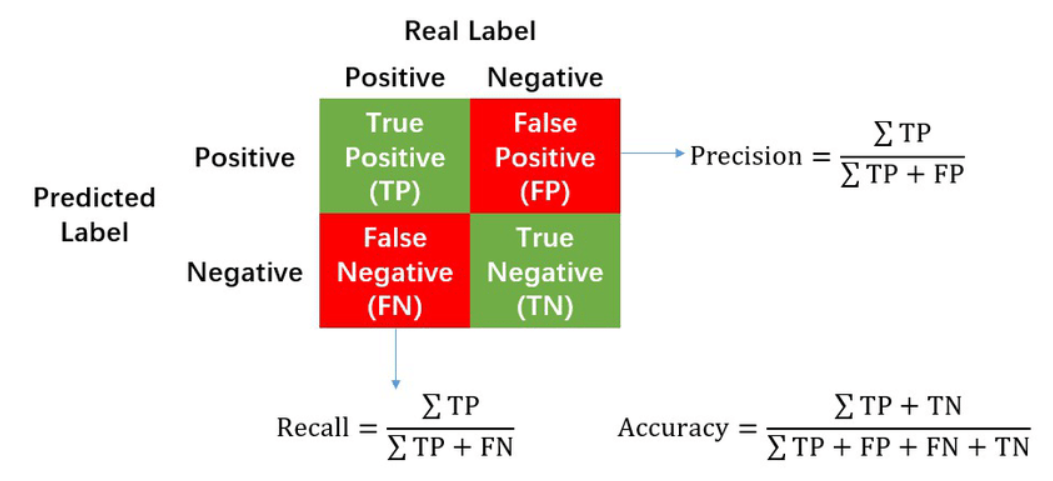

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [47]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

               precision    recall  f1-score   support

         Mild       0.71      0.82      0.76       100
     Moderate       0.67      0.60      0.63       100
       Normal       0.96      0.96      0.96       100
Proliferative       0.70      0.64      0.67       100
       Severe       0.75      0.78      0.76       100

     accuracy                           0.76       500
    macro avg       0.76      0.76      0.76       500
 weighted avg       0.76      0.76      0.76       500



In [48]:
cn = confusion_matrix(Y_true, predicted_categories)
cn


array([[82,  9,  1,  4,  4],
       [18, 60,  3,  9, 10],
       [ 1,  2, 96,  0,  1],
       [14, 11,  0, 64, 11],
       [ 1,  7,  0, 14, 78]])

### Confusion Matrix Visualization

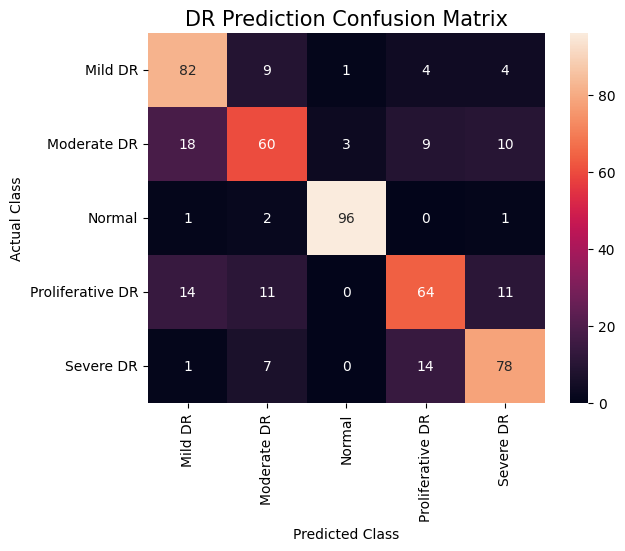

In [49]:
# plt.figure(figsize=(40,40))
class_names = ['Mild DR', 'Moderate DR','Normal', 'Proliferative DR', 'Severe DR' ]
sns.heatmap(cn, annot=True, annot_kws={'size':10}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("DR Prediction Confusion Matrix", fontsize=15)
plt.show()